In [ ]:
%%bash
#Se carga la versión correspondiente de python
module load python/3.9_miniconda-4.9.2
#Se crea el ambiente llamado "llamado ensamblaje"
conda create --name ensamblaje
conda init bash
#Se activa el ambiente
conda activate kneumo_ensamble

#Se instalan los programas que se usarán
#Fastqc
conda install -c bioconda fastqc
#Trimmomatic
conda install -c bioconda trimmomatic
#ABySS
conda install -c bioconda abyss
#SPAdes
conda install -c bioconda spades

#Se realiza el analisis con Fastqc
fastqc SRR23493801.fastq
#Se pasa descarga el html de apolo para visualizarlo. Este comando está escrito para ser ejecutado desde la terminal del usuario y no desde apolo
scp dagomezs1@apolo.eafit.edu.co:/home/dagomezs1/ensamblaje/SRR23493801_fastqc.html .

#Se realiza el trimado y se realiza el analisis del nuevo archivo, se obtiene el archivo .html y se descarga
trimmomatic SE -phred33 SRR23493801.fastq trimmed.fastq SLIDINGWINDOW:4:20 MINLEN:25
fastqc trimmed.fastq 
scp dagomezs1@apolo.eafit.edu.co:/home/dagomezs1/ensamblaje/trimmed_fastqc.html .

#Por último se hace el ensamblaje con ABySS
abyss-pe k=63 se=trimmed.fastq name=SRR23493801 "unitigs"
#Se revisan los resultados luego del uso de AByss
abyss-fac SRR23493801.fa


Ensamblaje *Limosilactobacillus reuteri* (92126)

Al analizar la calidad de las secuencias a partir del html exportado luego del trimaje se observó una buena calidad a lo largo de toda la secuencia.

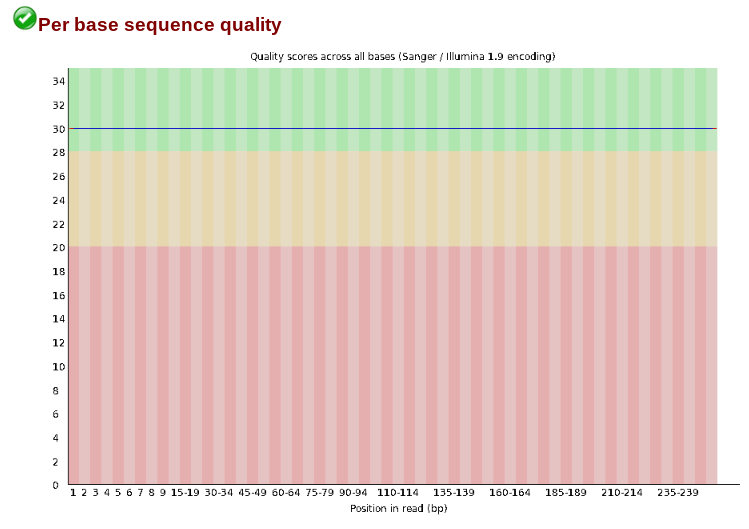

Este archivo presentó 340,4 Mbp y un %GC de 39.
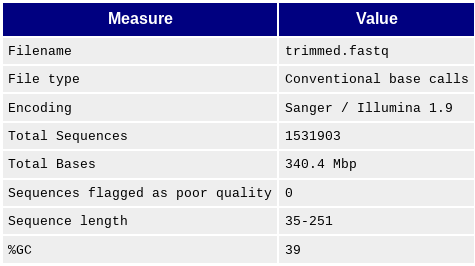

Luego del ensamblaje usando ABySS se obtuvieron los siguientes resultados utilizando k = 63 en los kmers.
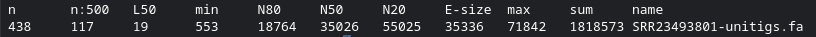

Utilizando k = 90 se obtuvieron los siguientes resultados
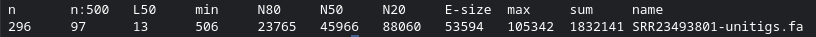

El ensamblaje publicado en NCBI tiene los siguientes resultados
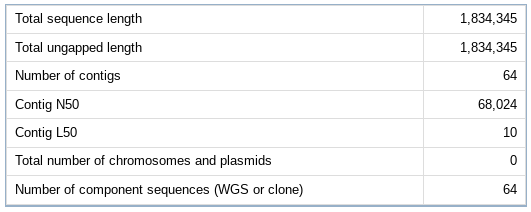

Comparando los resultados de la calidad del archivo trimado se observa que tienen un número de bps similar al publicado en NCBI, el archivo html mostró 340,4 Mbps, mientras que en NCBI se reporta un tamaño de 344,4 Mbps. 

Los resultados con k = 63 indican que se ensamblaron 438 secuencias, de las cuales 117 tienen una longitud de al menos 500 bp. El valor de N50 es de 35,026 bp, esto quiere decir que la mitad del genoma se ensambló en fragmentos de al menos esa longitud. El E-size correspondiente al tamaño estimado del genoma ensamblado es de 35336 bp.

En el caso de k = 90 lso resultados indican que se ensamblaron 296 secuencias, de estas 97 tienen una longitud de al menos 500 bp. El valor de N50 es de 45,966 bp, lo que indica que la mitad del genoma se ensambló en fragmentos de al menos esa longitud. El E-size correspondiente al tamaño estimado del genoma ensamblado es de 53,594 bp.

Cuando el valor de L50 es menor, indica una mayor calidad del ensamblaje debido a que se requieren menos fragmentos para llegar al 50% de la longitud total ensamblada. En el caso de k = 63 L50 fue igual a 19, mientras que con k = 90 L50 fue igual a 13, lo que indica que con un valor de k mayor se pueden obtener mejores resultados en este caso concreto, o por lo menos acercarse mas al valor reportado en NCBI para L50 que fue de 10.
